## Task: 02

The goal of this task is to implement **Gradient Descent** algorithm in Python. Gradient Descent dictates how the weights get updated from an inital value to ensure we reach a minimal loss value.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let us make use of a randomly-created sample dataset as follows

In [2]:
#sample-dataset
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# Let us initialize our weight value (w) with 1.0
w = 1.0

## Task: 02 - a
Implement the forward and loss functions

In [3]:
# Function for forward pass to predict y
def forward(x):
    return x*w

# Function to calcuate the loss of the model
# Loss is the square of difference of prediction and actual value
def loss(y_pred,y_actual):
    return (y_pred-y_actual)**2

### Gradient Descent

We update the `w` such that loss is minimum. The factor by which `w` is updated each time is called `alpha(learning rate)`.

New `w` is `w` minus `alpha` times derivative of `loss` against `w`, which can be mathematically expressed as follows:

$w=w-\alpha*\frac{d(loss)}{dw}$

This equation is dependent on how the loss function has been defined. 
In the current case below formula will dictate how to update the value of w for each pass. 

$w = w - \alpha*(2x)*(y_{pred}-y_{actual})$


## Task: 02 - b
Complete the gradient function

In [4]:
# Function to calculate the gradient for w to be updated and get min loss.
# Gradient = derivative of the loss for constant x and y with respect to the weight w

def gradient(x,y):
    return 2*x*(x*w-y)

Calculate $y_{pred}$ for $x=4$ without training the model

In [5]:
y_pred_without_train = forward(4)

Begin Training

In [6]:
# In this method, we learn the dataset multiple times (called epochs)
# Each time, the weight (w) gets updates using the graident decent algorithm based on weights of the previous epoch

alpha = 0.01 # Let us set learning rate as 0.01
weight_list = []
loss_list=[]

for epoch in range(100):
    total_loss=0
    count = 0
    for x, y in zip(x_data, y_data):
        
        y_pred = forward(x)
        grad = gradient(x, y)
        w = w - (alpha * grad)
        
        current_loss=loss(y_pred, y)
        total_loss+=current_loss
        
        count += 1
    
    avg_mse = total_loss / count
    print('Progress: ', epoch, 'w=', w, 'loss=', avg_mse)
    weight_list.append(w)
    loss_list.append(avg_mse) 

Progress:  0 w= 1.260688 loss= 4.0525143466666655
Progress:  1 w= 1.453417766656 loss= 2.2150323422596667
Progress:  2 w= 1.5959051959019805 loss= 1.2106973245614812
Progress:  3 w= 1.701247862192685 loss= 0.6617456475624202
Progress:  4 w= 1.7791289594933983 loss= 0.36169841395033914
Progress:  5 w= 1.836707389300983 loss= 0.19769792689395907
Progress:  6 w= 1.8792758133988885 loss= 0.1080581744091792
Progress:  7 w= 1.910747160155559 loss= 0.05906267829964466
Progress:  8 w= 1.9340143044689266 loss= 0.03228261061229798
Progress:  9 w= 1.9512159834655312 loss= 0.01764510140664452
Progress:  10 w= 1.9639333911678687 loss= 0.00964449893442513
Progress:  11 w= 1.9733355232910992 loss= 0.005271511767061955
Progress:  12 w= 1.9802866323953892 loss= 0.0028813146747399157
Progress:  13 w= 1.9854256707695 loss= 0.0015748754098861908
Progress:  14 w= 1.9892250235079405 loss= 0.0008607989187741338
Progress:  15 w= 1.9920339305797026 loss= 0.000470497395483675
Progress:  16 w= 1.994110589284741 

Calculate $y_{pred}$ for $x=4$ after training the model

In [7]:
y_pred_with_train = forward(4)

print("Actual Y Value for x=4 : 8")
print("Predicted Y Value before training : " , y_pred_without_train)
print("Predicted Y Value after training : " , y_pred_with_train)

Actual Y Value for x=4 : 8
Predicted Y Value before training :  4.0
Predicted Y Value after training :  7.9999999999996945


### Visualize Loss as a function of weight

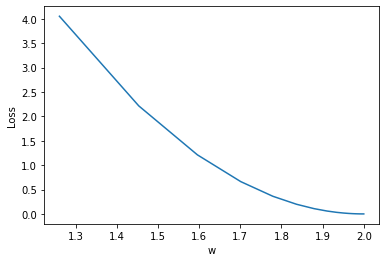

In [8]:
plt.plot(weight_list, loss_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()